## envioroment importion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
path1 = 'D:\Projects_VSCode\Projects_py\ML_NKU\Lab2\machine-learning-ex2\ex2\ex2data1.txt'
path2 = 'D:\Projects_VSCode\Projects_py\ML_NKU\Lab2\machine-learning-ex2\ex2\ex2data2.txt'

### plot data

In [2]:
def PlotData(X,Y):
    pos = np.argwhere(Y==1).reshape(1,-1)[0]
    neg = np.argwhere(Y==0).reshape(1,-1)[0]
    f1 = plt.figure(1)
    plt.scatter(X[0,pos],X[1,pos],c='k',marker='+', label='y=1')
    plt.scatter(X[0,neg],X[1,neg],c='y',marker='o', label='y=0')

    return f1


### sigmoid function

In [3]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))


# ex2

## data loader

In [4]:
Data1 = np.array(pd.read_csv(path1,header=None))

In [5]:
X = Data1[:,0:2].T
Y = Data1[:,2].reshape(1,-1)
n,m = X.shape

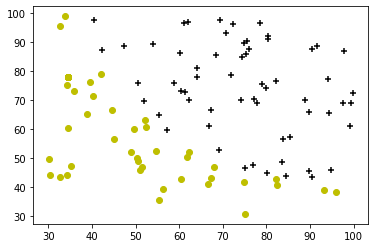

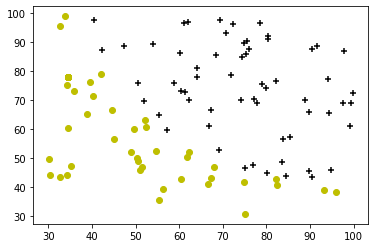

In [6]:
PlotData(X,Y)

## Compute cost and gradient

In [7]:
X = np.insert(X, n, np.ones(m),axis=0)
init_theta = np.zeros((n+1,1))


### cost function

In [8]:
def costFunction(theta, X, y):
    hx = Sigmoid(theta.T.dot(X))
    J = -np.sum(y*np.log(hx)+(1-y)*np.log(1-hx))/m
    return J

In [9]:
# test
print(costFunction(theta=init_theta, X=X, y=Y))

0.6931471805599453


### gradient

In [10]:
def gradient(theta, X, y):
    grad = np.zeros(theta.shape)
    hx = Sigmoid(theta.T.dot(X))
    grad = ((hx-y)@X.T).T
    return grad

## Optimizaing

In [11]:
result = op.minimize(fun=costFunction, x0=init_theta.flatten(),args=(X,Y.flatten()),method='TNC',jac=gradient)
min_theta = result.x
min_theta

array([  0.20597439,   0.20121145, -25.1291728 ])

## Plot Boundary

In [12]:
def PlotBoundary(theta,X,Y):
    plt.figure(1)
    f1 = PlotData(X,Y)
    x = np.linspace(30,100,1000)
    a = theta[0]
    b = theta[1]
    c = theta[2]
    plt.plot(x,-(a*x+c)/b, 'b-')
    plt.xlabel('Exam 1')
    plt.ylabel('Exam 2')
    plt.ylim(30,100)

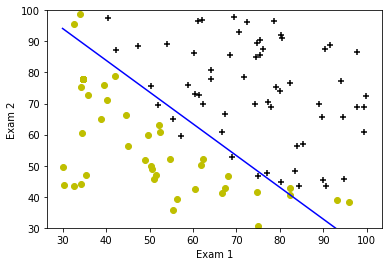

In [13]:
PlotBoundary(min_theta,X,Y)
plt.show()

## Predict

In [ ]:
def predict(theta,X):
    prob = Sigmoid(theta.T@X)
    return [1 if x >= 0.5 else 0 for x in prob]

a student with score 45 and 85

In [20]:
x_test = np.array([45,85,1]).T
prob = Sigmoid(x_test@min_theta)
print(f'For a student with scores 45 and 85, we predict an admission probability of {prob*100:.2f}%')

For a student with scores 45 and 85, we predict an admission probability of 77.60%


## Accuracy

In [14]:
y_pre = np.array(predict(min_theta, X)).reshape(1,-1)
acc = np.mean(y_pre == Y)
print(f'The test accuracy of this model is {acc*100:.2f}%')

The test accuracy of this model is 89.00%


# ex2_reg

## data loader

In [130]:
Data2 = pd.read_csv(path2, names=['test1', 'test2', 'Accepted'])

## show data

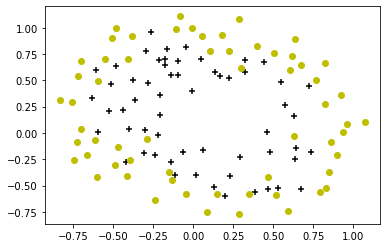

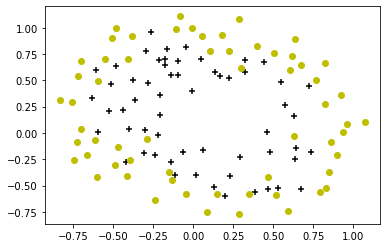

In [131]:
PlotData(Data2.iloc[:, 0:2].values.T,Data2.iloc[:, -1].values.T)
# plt.show()

## hyper parameter

In [132]:
lambd = 1
dim = 6 #max dimension when feature mapping
Iters = 400

## logistic regression

### feature mapping

In [133]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    return pd.DataFrame(data)


In [134]:
x1 = Data2['test1']
x2 = Data2['test2']
data2 = feature_mapping(x1, x2, dim)
print(data2)

     F00       F10       F01       F20       F11       F02           F30  \
0    1.0  0.051267  0.699560  0.002628  0.035864  0.489384  1.347453e-04   
1    1.0 -0.092742  0.684940  0.008601 -0.063523  0.469143 -7.976812e-04   
2    1.0 -0.213710  0.692250  0.045672 -0.147941  0.479210 -9.760555e-03   
3    1.0 -0.375000  0.502190  0.140625 -0.188321  0.252195 -5.273438e-02   
4    1.0 -0.513250  0.465640  0.263426 -0.238990  0.216821 -1.352032e-01   
..   ...       ...       ...       ...       ...       ...           ...   
113  1.0 -0.720620  0.538740  0.519293 -0.388227  0.290241 -3.742131e-01   
114  1.0 -0.593890  0.494880  0.352705 -0.293904  0.244906 -2.094682e-01   
115  1.0 -0.484450  0.999270  0.234692 -0.484096  0.998541 -1.136964e-01   
116  1.0 -0.006336  0.999270  0.000040 -0.006332  0.998541 -2.544062e-07   
117  1.0  0.632650 -0.030612  0.400246 -0.019367  0.000937  2.532156e-01   

          F21       F12       F03  ...       F23           F14           F05  \
0    0.

### dataset

In [135]:
X = data2.values.T

print(X.shape)
Y = Data2.iloc[:, -1].values.reshape(1,-1)


print(Y.shape)

(28, 118)
(1, 118)


## Compute cost and gradient

### cost function

In [136]:
def costFunction_reg(theta,X,Y,lambd):
    J = costFunction(theta,X,Y)
    J += lambd*np.sum(theta)/(2*m)
    return J

In [137]:
init_theta = np.zeros((X.shape[0],1))
print(init_theta.shape)

(28, 1)


In [138]:
# test
print(costFunction_reg(init_theta,X,Y,lambd=lambd))

0.8179136730607355


### gradient

In [139]:
def gradient_reg(theta,X,Y,lambd):
    grad = gradient(theta,X,Y)
    grad+=lambd*theta/m
    return grad

## Optimizing

In [140]:
result = op.minimize(fun=costFunction_reg, x0=init_theta.flatten(),args=(X,Y.flatten(),lambd),method='TNC',jac=gradient_reg,options={'maxiter':Iters})

theta = result.x
print(theta)

[  5.60148113   4.37143708   7.25464458  -1.90461691 -12.26388776
 -10.54947596   3.97825905  -1.07132165   3.56984444  -0.60731844
  -8.98023004  11.10749327 -11.08571016  -5.91972819  -8.75818275
  -4.20016326   0.88719589  10.30742779  -8.95486707  -8.4503246
   1.70914469 -13.28213901   7.83813051  -4.60901416   6.76390176
  -9.71816784  -8.19954352  -2.21508253]


## plot boundary

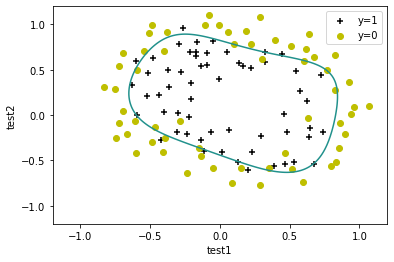

In [141]:
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z = feature_mapping(xx.ravel(), yy.ravel(), dim).values
zz = z @ theta
zz = zz.reshape(xx.shape)
fig, ax = plt.subplots()
PlotData(Data2.iloc[:, 0:2].values.T,Data2.iloc[:, -1].values.T)
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')
plt.contour(xx, yy, zz, 0)
plt.show()


## Predict

In [143]:
y_pre = np.array(predict(theta, X)).reshape(1,-1)
acc = np.mean(y_pre == Y)
print(f'The test accuracy of this model is {acc*100:.2f}%')

The test accuracy of this model is 0.8390
